
# Introduction: Optimizing Drip Irrigation for Precision Agriculture

Welcome to this Jupyter Notebook! In the realm of modern agriculture, **efficient water and 
nutrient delivery** are absolutely critical. This script dives into a key aspect of that efficiency: accurately predicting **water travel time** within drip irrigation systems. Understanding this is essential for optimizing how and when water reaches your crops.

Here, we'll walk through the development of a robust predictive model. Our approach involves breaking down the dripline into smaller segments and calculating the time it takes for water to advance through each one, all based on established hydraulic principles. You'll see how we leverage powerful Python libraries like **Pandas, NumPy, Matplotlib, Seaborn, and SciPy** to build and refine this model.

We've meticulously simulated over 1,500 different dripline configurations to train and evaluate our model, using advanced **optimization techniques from SciPy** to fine-tune its parameters. The goal? To provide you with a reliable tool for estimating water travel time, ultimately leading to more precise irrigation scheduling and better resource management. 

### By Gregory Guevara. Earth University 
#### July 2025

### Objective: To understand the behavoir and mathematical equations to describe the advance time in drip lines during fertigation process, using the hydraulic models for pressurized system by Python 

#### In the first stage, we introduce the phenomenon and develop an algorithm to calculate the travel time based on specific inputs.

In [2]:

import math 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

In [3]:
#basic input for basic analysis
# inputs
q= 1 #flow l/h
S=0.5   #spacing between drippers 
L=150     #lenght of dripline 
dia=20.2  # internal diameter      

In [4]:

df=pd.DataFrame()
df["outlets"]=0
df["long_acum"]=0
df["q_tramo"]=0

df["v_tramo"]=0
df["t_tramo"]=0
df["t_acum"]=0
df["headloss"]=0
df["HL_acum"]=0


outlets=L/S
Q=outlets*q
qq=Q+q
a=range(1,int(outlets)+1)
ss=0
Area= 3.141516*(dia/2000)**2
for x in a: 
    qq=qq-q # decrease the flow for each outlet
    ss=ss+S #step for outlets index 
    df.at[x,'outlets']=x # column of N of outlets 
    df.at[x,'long_acum']=ss # column for acumulated lenght 
    df.at[x,'q_tramo']=qq
#calculating the travel time   
df["v_tramo"]=df["q_tramo"]/Area/3600/1000
df["t_tramo"]=S/df["v_tramo"]
df["t_acum"]=df['t_tramo'].cumsum()/60
travel_time= round(df["t_tramo"].sum()/60,)
aa=int(outlets*.95)
travel_time_95=round(df.loc[aa,'t_acum'],4)
#calculating the headloss 
df["headloss"]= 1.131*10**9*(df["q_tramo"]/1000/140)**1.852*S*dia**-4.872
HF=round(df["headloss"].sum(),2)
df["HL_acum"]=df['headloss'].cumsum()

#outputs 
print ("The travel time in 100% of lenght: " + str(travel_time) + " minutes")
print ("The travel time in 95% of lenght:  " + str(travel_time_95) + " minutes")
print ("The total head loss:  " + str(HF) + " m")
print (df.head())
print (df.describe())
df.to_csv('salida_basic.csv')


The travel time in 100% of lenght: 60 minutes
The travel time in 95% of lenght:  28.5 minutes
The total head loss:  0.3 m
   outlets  long_acum  q_tramo   v_tramo   t_tramo    t_acum  headloss  \
1      1.0        0.5    300.0  0.260038  1.922796  0.032047  0.002817   
2      2.0        1.0    299.0  0.259171  1.929227  0.064200  0.002799   
3      3.0        1.5    298.0  0.258304  1.935701  0.096462  0.002782   
4      4.0        2.0    297.0  0.257438  1.942218  0.128832  0.002765   
5      5.0        2.5    296.0  0.256571  1.948780  0.161312  0.002748   

    HL_acum  
1  0.002817  
2  0.005616  
3  0.008398  
4  0.011163  
5  0.013911  
          outlets   long_acum     q_tramo     v_tramo     t_tramo      t_acum  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   150.500000   75.250000  150.500000    0.130452   12.080283    9.613981   
std     86.746758   43.373379   86.746758    0.075191   40.993237    9.528674   
min      1.000000    0.50

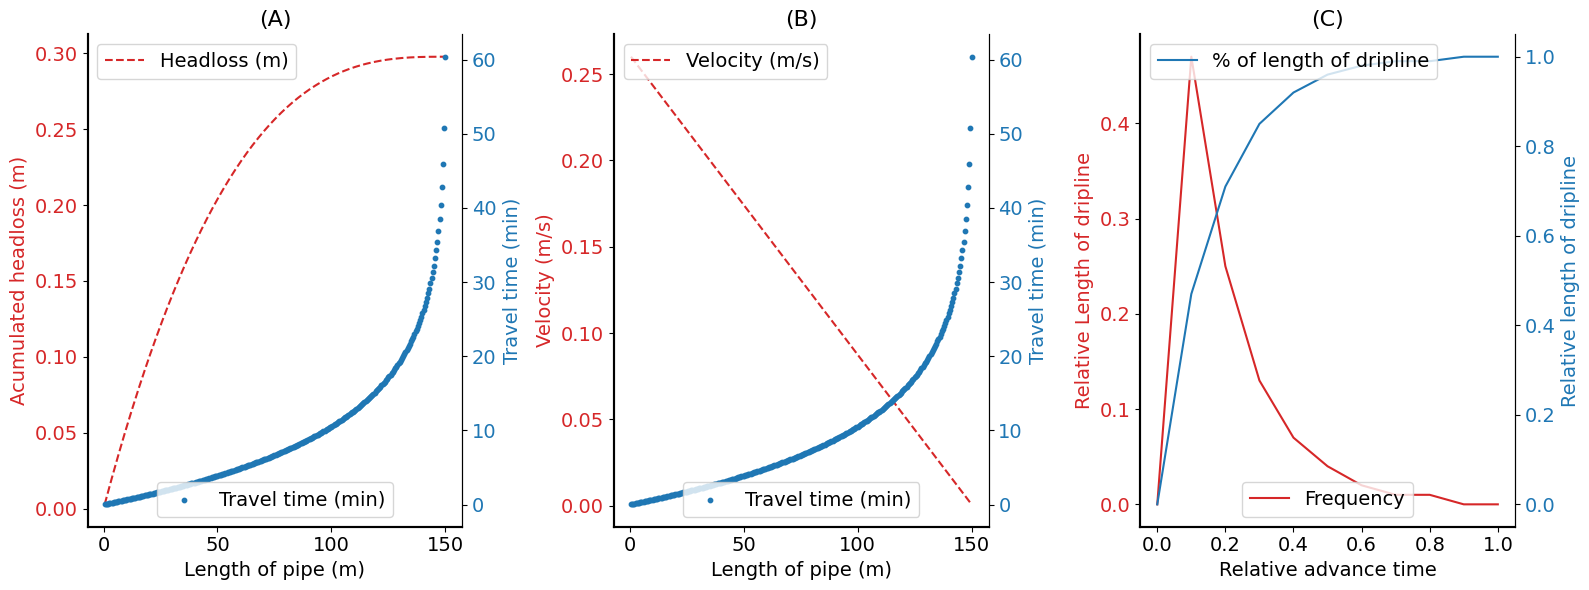

In [5]:
## graphs 

import matplotlib.pyplot as plt
import seaborn as sb

fig = plt.figure(figsize=(16, 6))

# Función para configurar los ejes visibles
def configurar_ejes(ax):
    ax.grid(False)  # Desactivar la cuadrícula
    ax.spines['top'].set_visible(False)  # Ocultar borde superior
    ax.spines['right'].set_visible(True)  # Ocultar borde derecho
    ax.spines['left'].set_visible(True)  # Asegurar que el eje Y sea visible
    ax.spines['bottom'].set_visible(True)  # Asegurar que el eje X sea visible
    ax.spines['left'].set_linewidth(1.5)  # Grosor del eje Y
    ax.spines['bottom'].set_linewidth(1.5)  # Grosor del eje X
    ax.tick_params(labelsize=14)  # Tamaño de la fuente de los ticks
# Primer gráfico
ax1 = fig.add_subplot(131)
configurar_ejes(ax1)

color = 'tab:red'
ax1.set_xlabel('Length of pipe (m)', fontsize=14)
ax1.set_ylabel('Acumulated headloss (m)', color=color, fontsize=14)
ax1.plot(df['long_acum'], df['HL_acum'], color=color, linestyle='--', label="Headloss (m)")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="upper left", fontsize=14)
ax1.set_title('(A)',fontsize=16)

ax2 = ax1.twinx()
configurar_ejes(ax2)
color = 'tab:blue'
ax2.set_ylabel('Travel time (min)', color=color, fontsize=14)
ax2.scatter(df['long_acum'], df['t_acum'], color=color, s=10, label="Travel time (min)")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="lower center", fontsize=14)

# Segundo gráfico
ax1 = fig.add_subplot(132)
configurar_ejes(ax1)

color = 'tab:red'
ax1.set_xlabel('Length of pipe (m)', fontsize=14)
ax1.set_ylabel('Velocity (m/s)', color=color, fontsize=14)
ax1.plot(df['long_acum'], df['v_tramo'], color=color, linestyle='--', label="Velocity (m/s)")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="upper left", fontsize=14)
ax1.set_title('(B)',fontsize=16)

ax2 = ax1.twinx()
configurar_ejes(ax2)
color = 'tab:blue'
ax2.set_ylabel('Travel time (min)', color=color, fontsize=14)
ax2.scatter(df['long_acum'], df['t_acum'], color=color, s=10, label="Travel time (min)")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="lower center", fontsize=14)

# Tercer gráfico
a = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.00]
b = [0.00, 0.47, 0.25, 0.13, 0.07, 0.04, 0.02, 0.01, 0.01, 0.00, 0.00]
c = [0, 0.47, 0.71, 0.85, 0.92, 0.96, 0.98, 0.99, 0.99, 1, 1]

ax1 = fig.add_subplot(133)
configurar_ejes(ax1)

color = 'tab:red'
ax1.set_xlabel('Relative advance time', fontsize=14)
ax1.set_ylabel('Relative Length of dripline', color=color, fontsize=14)
ax1.plot(a, b, color=color, label="Frequency")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="lower center", fontsize=14)
ax1.set_title('(C)',fontsize=16)

ax2 = ax1.twinx()
configurar_ejes(ax2)
color = 'tab:blue'
ax2.set_ylabel('Relative length of dripline', color=color, fontsize=14)
ax2.plot(a, c, color=color, label="% of length of dripline")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="upper left", fontsize=14)

fig.tight_layout()
plt.show()




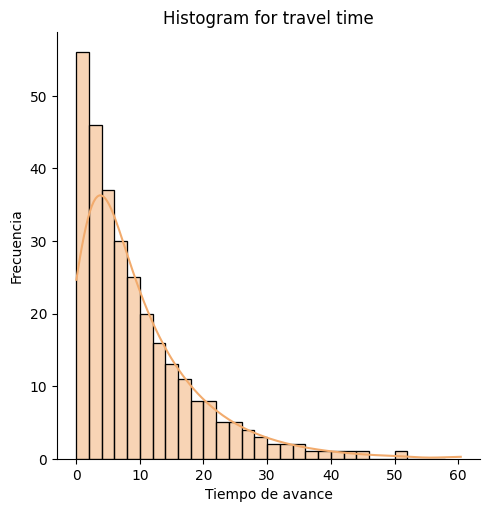

In [6]:

# Histograma en Seaborn
fin = int(max(df['t_acum']))
intervalos = range(0, fin, 2)
sb.displot(df['t_acum'], color='#F2AB6D', bins=intervalos, kde=True)

# Configuración en Matplotlib
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de avance')
plt.title('Histogram for travel time')

plt.show()

### Graph analysis for differents flows in driplines 

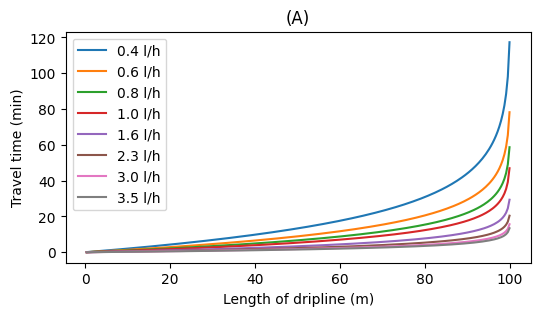

In [7]:
# inputs
dia=20.2
Area= 3.141516*(dia/2000)**2
item=1
S=0.4
flows=[0.4,0.6,0.8,1.0,1.6,2.3,3.0,3.5]
L=100
outlets=L/S

fig, ax1 = plt.subplots(figsize=(6,3))
ax1.grid(False)
ax1.set_xlabel('Length of dripline (m)')
ax1.set_ylabel('Travel time (min)')
#ax1.set_title('Efect in travel time by diferent flow of dripper')

for fls in flows: # testing a range of typical dripper flows 
    q=fls
    Q=outlets*q
    qq=Q+q
    a=range(1,int(outlets)+1)
    df1=pd.DataFrame()
    df1["outlets"]=0
    df1["long_acum"]=0
    df1["q_tramo"]=0
    df1["v_tramo"]=0
    df1["t_tramo"]=0
    df1["t_tramo_acum"]=0
    ss=0
    
    for x in a: 
        qq=qq-q # decrease the flow for each outlets
        ss=ss+S #step for outlet index
        df1.at[x,'outlets']=x # column N outles "
        df1.at[x,'long_acum']=ss # column acumulate lenght"
        df1.at[x,'q_tramo']=qq
    #calculating the travel time   
    df1["v_tramo"]=df1["q_tramo"]/Area/3600/1000
    df1["t_tramo"]=S/df1["v_tramo"]
    df1["t_tramo_acum"]=df1['t_tramo'].cumsum()/60
    travel_time= round(df1["t_tramo"].sum()/60,2)
    aa=int(outlets*.95)
    travel_time_95=df1.loc[aa,'t_tramo_acum']
    #calculating the velocity 
    max_vel=Q/Area/1000/3600
    #calculating the headloss 
    df1["headloss"]= 1.131*10**9*(df["q_tramo"]/1000/140)**1.852*S*dia**-4.872
    HF=round(df["headloss"].sum(),2)

    rect1= ax1.plot(df1['long_acum'], df1['t_tramo_acum'], 
            label=str(q)+" l/h",linestyle='-')
    ax1.tick_params(axis='y')
    ax1.set_title('(A)')
    ax1.legend()
plt.show()
        

### simulator for multiples variables 

In [8]:
dfout=pd.DataFrame()
dfout["item"]=0
dfout["flow"]=0
dfout["spacing"]=0
dfout["length"]=0
dfout["diameter"]=0
dfout["fulltime"]=0
dfout["time95"]=0
dfout["velocity"]=0
dfout["headloss"]=0



ss=0
diameter=[13.6,16.2,22.2]
item=1
spacing= [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
flows=[0.4,0.6,0.8,1.0,1.6,2.3,3,3.5]
length=[20,40,80,120,160,200,250,300]
for diam in diameter:
    dia=diam
    Area= 3.141516*(dia/2000)**2
    for ln in length: #testing a range of lenghts 
        L=ln
        for fls in flows: # testing a range of typical dripper flows 
            q=fls
            for sp in spacing: #testing dripper spacing by 10 cm 
                S=sp
                outlets=L/S
                Q=outlets*q
                qq=Q+q
                a=range(1,int(outlets)+1)
                df1=pd.DataFrame()
                df1["outlets"]=0
                df1["long_acum"]=0
                df1["q_tramo"]=0
                df1["v_tramo"]=0
                df1["t_tramo"]=0
                df1["t_tramo_acum"]=0
                for x in a: 
                    qq=qq-q # decrease the flow for each outlets
                    ss=ss+S #step for outlet index
                    df1.at[x,'outlets']=x # column N outles "
                    df1.at[x,'long_acum']=ss # column acumulate lenght"
                    df1.at[x,'q_tramo']=qq
                #calculating the travel time   
                df1["v_tramo"]=df1["q_tramo"]/Area/3600/1000
                df1["t_tramo"]=S/df1["v_tramo"]
                df1["t_tramo_acum"]=df1['t_tramo'].cumsum()/60
                travel_time= round(df1["t_tramo"].sum()/60,2)
                aa=int(outlets*.95)
                travel_time_95=df1.loc[aa,'t_tramo_acum']
                #calculating the velocity 
                max_vel=Q/Area/1000/3600
                #calculating the headloss 
                df["headloss"]= 1.131*10**9*(df["q_tramo"]/1000/140)**1.852*S*dia**-4.872
                HF=round(df["headloss"].sum(),2)

                #outputs 
                dfout.at[item,'item']=item
                dfout.at[item,'flow']=q
                dfout.at[item,'spacing']=S
                dfout.at[item,'diameter']=dia
                dfout.at[item,'length']=L
                dfout.at[item,'fulltime']=travel_time
                dfout.at[item,'time95']=travel_time_95
                dfout.at[item,'velocity']=max_vel
                dfout.at[item,'headloss']=HF
                
                item+=1
print (dfout)

        

        item  flow  spacing  length  diameter  fulltime     time95  velocity  \
1        1.0   0.4      0.2    20.0      13.6     22.61  12.655566  0.076489   
2        2.0   0.4      0.3    20.0      13.6     26.31  18.157411  0.050993   
3        3.0   0.4      0.4    20.0      13.6     39.21  23.235266  0.038245   
4        4.0   0.4      0.5    20.0      13.6     46.61  30.271608  0.030596   
5        5.0   0.4      0.6    20.0      13.6     47.77  32.356773  0.025496   
...      ...   ...      ...     ...       ...       ...        ...       ...   
1532  1532.0   3.5      0.5   300.0      22.2     23.14   9.886747  1.507064   
1533  1533.0   3.5      0.6   300.0      22.2     27.04  11.851651  1.255886   
1534  1534.0   3.5      0.7   300.0      22.2     27.68  13.782285  1.076474   
1535  1535.0   3.5      0.8   300.0      22.2     34.53  15.700651  0.941915   
1536  1536.0   3.5      0.9   300.0      22.2     35.49  17.494271  0.837258   

      headloss  
1         0.82  
2    

In [9]:
dfout.to_csv('salida.csv')


In [27]:

import math 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [28]:

#open data frame de excel 
dfout = pd.read_csv('https://raw.githubusercontent.com/greko-guevara/Adavance_Time_driplines/refs/heads/main/salida.csv')
print(dfout.shape)
print(dfout)
dfout.dtypes

(1536, 10)
      Unnamed: 0    item  flow  spacing  length  diameter  fulltime  \
0              1     1.0   0.4      0.2    20.0      13.6     22.61   
1              2     2.0   0.4      0.3    20.0      13.6     26.31   
2              3     3.0   0.4      0.4    20.0      13.6     39.21   
3              4     4.0   0.4      0.5    20.0      13.6     46.61   
4              5     5.0   0.4      0.6    20.0      13.6     47.77   
...          ...     ...   ...      ...     ...       ...       ...   
1531        1532  1532.0   3.5      0.5   300.0      22.2     23.14   
1532        1533  1533.0   3.5      0.6   300.0      22.2     27.04   
1533        1534  1534.0   3.5      0.7   300.0      22.2     27.68   
1534        1535  1535.0   3.5      0.8   300.0      22.2     34.53   
1535        1536  1536.0   3.5      0.9   300.0      22.2     35.49   

         time95  velocity  headloss  
0     12.655566  0.076489      0.82  
1     18.157411  0.050993      1.23  
2     23.235266  0.038

Unnamed: 0      int64
item          float64
flow          float64
spacing       float64
length        float64
diameter      float64
fulltime      float64
time95        float64
velocity      float64
headloss      float64
dtype: object

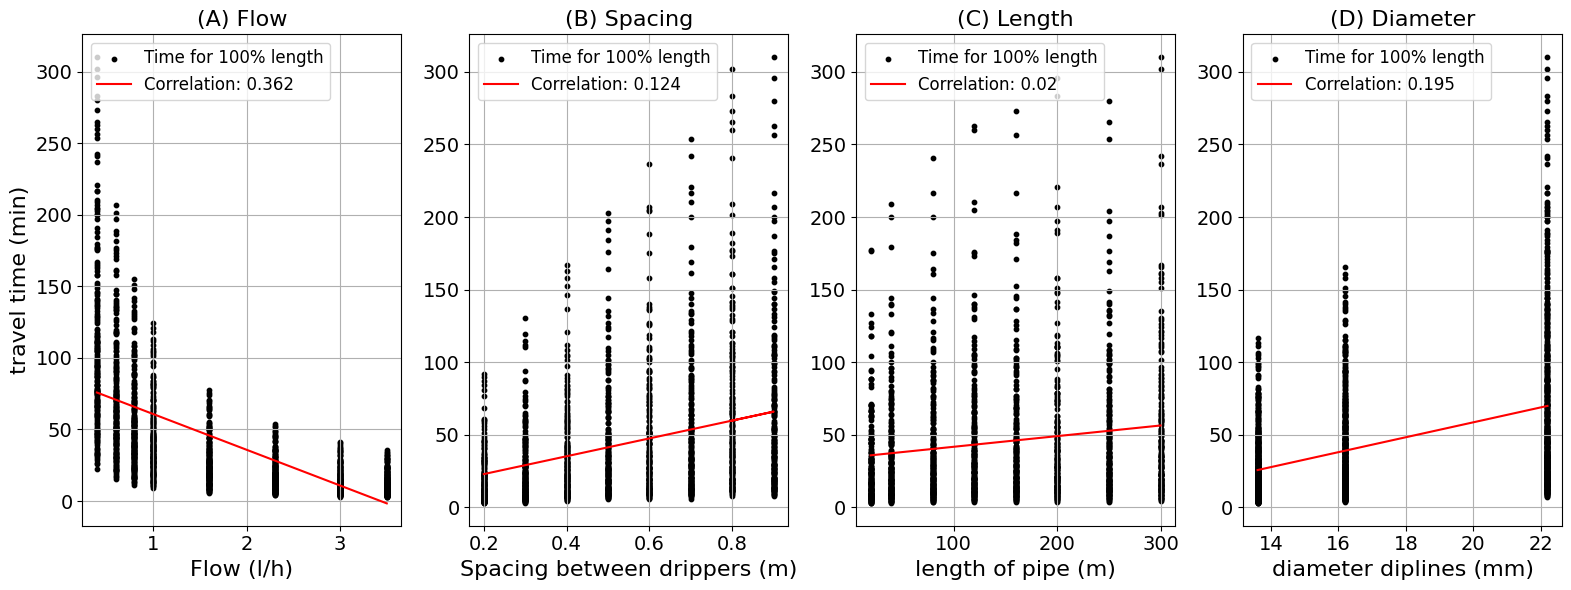

In [29]:


fig, axs = plt.subplots(1, 4, figsize=(16,6)) # Crea una figura con 4 subplots en una fila
plot1=axs[0]
plot2=axs[1]
plot3=axs[2]
plot4=axs[3]

# by flow #######################

#regression for full time (SOLO FULLTIME)
cdf = dfout[['flow','fulltime']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['flow']])
train_y = np.asanyarray(train[['fulltime']])
regr.fit (train_x, train_y)
test_x = np.asanyarray(test[['flow']])
test_y = np.asanyarray(test[['fulltime']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 
plot1.scatter(dfout['flow'], dfout['fulltime'],color='black',s=10,label="Time for 100% length") #Solo scatter para fulltime
plot1.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label="Correlation: "+str(r2)) #Solo regresion para fulltime

plot1.grid(True)
plot1.set_xlabel('Flow (l/h)',fontsize=16)
plot1.set_ylabel('travel time (min)',fontsize=16)
plot1.set_title('(A) Flow',fontsize=16)
plot1.legend(loc="upper left",fontsize=12)
plot1.tick_params(labelsize=14)  # Tamaño de la fuente de los ticks

#****************************************
# by spacing##############

#regression for full time (SOLO FULLTIME)
cdf = dfout[['spacing','fulltime']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['spacing']])
train_y = np.asanyarray(train[['fulltime']])
regr.fit (train_x, train_y)
test_x = np.asanyarray(test[['spacing']])
test_y = np.asanyarray(test[['fulltime']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 

plot2.scatter(dfout['spacing'], dfout['fulltime'],color='black',s=10,label="Time for 100% length") #Solo scatter para fulltime
plot2.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label="Correlation: "+str(r2)) #Solo regresion para fulltime

plot2.grid(True)
plot2.set_xlabel('Spacing between drippers (m)',fontsize=16)
plot2.set_title('(B) Spacing',fontsize=16)
plot2.legend(loc="upper left",fontsize=12)
plot2.tick_params(labelsize=14)  # Tamaño de la fuente de los ticks

# by lenght ##########################

#regression for full time (SOLO FULLTIME)
cdf = dfout[['length','fulltime']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['length']])
train_y = np.asanyarray(train[['fulltime']])
regr.fit (train_x, train_y)
test_x = np.asanyarray(test[['length']])
test_y = np.asanyarray(test[['fulltime']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3)

plot3.scatter(dfout['length'], dfout['fulltime'],color='black',s=10,label="Time for 100% length") #Solo scatter para fulltime
plot3.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label="Correlation: "+str(r2)) #Solo regresion para fulltime

plot3.grid(True)
plot3.set_xlabel('length of pipe (m)',fontsize=16)
plot3.set_title('(C) Length',fontsize=16)
plot3.legend(fontsize=12)
plot3.tick_params(labelsize=14)  # Tamaño de la fuente de los ticks
# by dimeter ##############

#regression for full time (SOLO FULLTIME)
cdf = dfout[['diameter','fulltime']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['diameter']])
train_y = np.asanyarray(train[['fulltime']])
regr.fit (train_x, train_y)
test_x = np.asanyarray(test[['diameter']])
test_y = np.asanyarray(test[['fulltime']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 

plot4.scatter(dfout['diameter'], dfout['fulltime'],color='black',s=10,label="Time for 100% length") #Solo scatter para fulltime
plot4.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label="Correlation: "+str(r2)) #Solo regresion para fulltime

plot4.grid(True)
plot4.set_xlabel('diameter diplines (mm)',fontsize=16)
plot4.set_title('(D) Diameter',fontsize=16)
plot4.legend(loc="upper left",fontsize=12)
plot4.tick_params(labelsize=14)  # Tamaño de la fuente de los ticks

fig.tight_layout()
plt.show()

Initial Objective: 1536.0
Final Objective: 5.42923925227497
Solution
A = 0.0912
B = -1.0
C = 0.7824
D = 0.1928
E = 1.9999
R^2 correlation = 0.9933


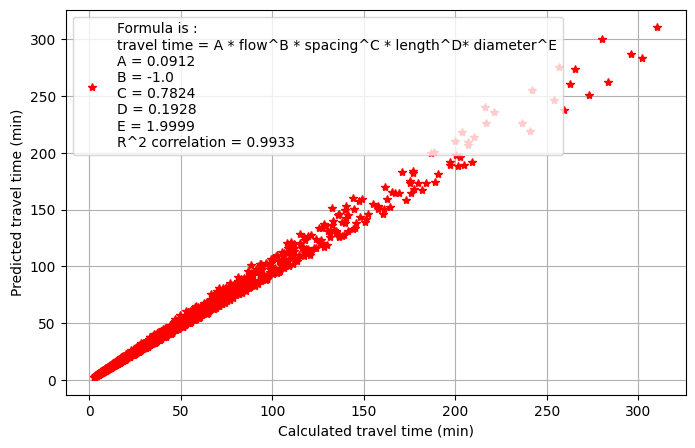

In [ ]:
from scipy.optimize import minimize
xm1 = np.array(dfout["flow"])  # flow_ dataframe to array 
xm2 = np.array(dfout["spacing"])   # spacing
xm3 = np.array(dfout["length"])  # length 
xm4 = np.array(dfout["diameter"])
ym = np.array(dfout["fulltime"])  # output for fulltime
# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    e = x[4]
    #y = a * xm1 + b  # linear regression
    y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d )*(  xm4 ** e)
    return y

# define objective
def objective(x):
    # calculate y
    y = calc_y(x)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i])/ym[i])**2    
    # return result
    return obj

# initial guesses
x0 = np.zeros(5)
x0[0] = 0.0 # a
x0[1] = 0.0 # b
x0[2] = 0.0 # c
x0[3] = 0.0 # d
x0[4] = 0.0 # e


# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
# bounds on variables
my_bnds = (-100.0, 100.0)
bnds = (my_bnds, my_bnds, my_bnds, my_bnds, my_bnds)
solution = minimize(objective, x0, method='SLSQP',bounds=bnds)
x = solution.x
y = calc_y(x)

# show final objective
cObjective = 'Final Objective: ' + str(objective(x))
print(cObjective)

# print solution
print('Solution')
cA = 'A = ' + str(round(x[0],4))
print(cA)
cB = 'B = ' + str(round(x[1],4))
print(cB)
cC = 'C = ' + str(round(x[2],4))
print(cC)
cD = 'D = ' + str(round(x[3],4))
print(cD)
cE = 'E = ' + str(round(x[4],4))
print(cE)

#ym measured outcome
#y  predicted outcome
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)
r2 = round(r_value**2,4)
cR2 = "R^2 correlation = " + str(round(r_value**2,4))
print(cR2)

cFormula = "Formula is : " + "\n" \
           + "travel time = A * flow^B * spacing^C * length^D* diameter^E"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n"+ cE + "\n" + cR2

# plot solution
plt.figure(figsize=(8,5))
#plt.title('Calculated travel time versus Predicted  Outcomes For Non-Linear Regression')
plt.plot(ym,y,'r*')
plt.xlabel('Calculated travel time (min)')
plt.ylabel('Predicted travel time (min)')
plt.legend([cLegend])
plt.grid(True)

plt.show()

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Convert the "flow" column from the DataFrame 'dfout' to a NumPy array. This represents the flow rate (x1).
x1_data = np.array(dfout["flow"])
# Convert the "spacing" column from the DataFrame 'dfout' to a NumPy array. This represents the spacing (x2).
x2_data = np.array(dfout["spacing"])
# Convert the "length" column from the DataFrame 'dfout' to a NumPy array. This represents the length (x3).
x3_data = np.array(dfout["length"])
# Convert the "diameter" column from the DataFrame 'dfout' to a NumPy array. This represents the diameter (x4).
x4_data = np.array(dfout["diameter"])
# Convert the "fulltime" column from the DataFrame 'dfout' to a NumPy array. This is the target variable (dependent variable), y.
y_data = np.array(dfout["fulltime"])

# --- Function to Fit (Linearized Form) ---
# which corresponds to a power-law relationship in the original space (y = A * x1^b1 * x2^b2 * x3^b3 * x4^b4).
# X is a tuple/array containing the logarithmic transformations of x1_data, x2_data, etc.
# a, b1, b2, b3, b4 are the parameters to be optimized.
def func(X, a, b1, b2, b3, b4):
    # Unpack the individual logarithmic data arrays from X.
    x1, x2, x3, x4 = X
    # Return the linear combination of parameters and logarithmic input data.
    return a + b1 * x1 + b2 * x2 + b3 * x3 + b4 * x4

# --- Linearize the Data ---
X = np.log([x1_data, x2_data, x3_data, x4_data])
# Apply a natural logarithm transformation to the dependent variable (target).
Y = np.log(y_data)

# --- Fit the Curve using Least Squares ---
# Use scipy.optimize.curve_fit to find the optimal parameters for the 'func' function.
# 'func': The model function to fit.
# 'X': The independent variable data (after linearization).
# 'Y': The dependent variable data (after linearization).
# popt (optimal parameters): An array containing the optimized values for 'a', 'b1', 'b2', 'b3', 'b4'.
# pcov (covariance matrix): A 2D array representing the estimated covariance of popt.
# The diagonal elements provide the variance of each parameter, which can be used to calculate standard errors.
popt, pcov = curve_fit(func, X, Y)

# --- Obtain Original Parameters ---
# The 'a' parameter in the linearized function (func) corresponds to the logarithm of the
# constant 'A' in the original power-law equation. So, we exponentiate popt[0] to get A.
a = np.exp(popt[0])
# The exponents b1, b2, b3, b4 from the linearized function directly correspond to the
# exponents in the original power-law equation.
b1 = popt[1]
b2 = popt[2]
b3 = popt[3]
b4 = popt[4]

# --- Print Results ---
# Print the optimized parameters for the original (non-linear) power-law model.
print("a =", a)
print("b1 =", b1)
print("b2 =", b2)
print("b3 =", b3)
print("b4 =", b4)
# Print the covariance matrix of the optimized parameters.
print(pcov)

a = 0.09278093190429265
b1 = -0.9999999890314879
b2 = 0.7844763563535911
b3 = 0.19055199681501636
b4 = 1.9999611003788222
[[ 5.12560611e-04 -1.04511177e-06  6.82703591e-06 -1.36392157e-05
  -1.55872281e-04]
 [-1.04511177e-06  4.17204649e-06 -4.30984000e-14  5.12475422e-14
  -2.71228779e-13]
 [ 6.82703591e-06 -4.30984000e-14  9.72018425e-06 -3.25970890e-14
   1.30155987e-13]
 [-1.36392157e-05  5.12475422e-14 -3.25970890e-14  2.91336127e-06
  -1.99340154e-14]
 [-1.55872281e-04 -2.71228779e-13  1.30155987e-13 -1.99340154e-14
   5.50450026e-05]]


C:\Users\gguevara\AppData\Local\Temp\ipykernel_980\3831929466.py:33: RuntimeWarning: Method BFGS cannot handle bounds.
  solution = minimize(objective, x0, method=j, bounds=bnds)


,Método,A,B,C,D,E,R2,mse,mae
0,SLSQP,0.0912,-1.0,0.7824,0.1928,1.9999,0.9933,14.0535,2.3137
5,BFGS,0.0912,-1.0,0.7824,0.1928,2.0,0.9933,14.0534,2.3137
1,Nelder-Mead,0.1821,-0.9961,0.8056,0.1718,1.7927,0.9902,29.7987,3.0227
4,COBYLA,1.1087,-1.0043,0.825,0.1397,1.2053,0.9484,167.9034,7.2902
3,TNC,10.5452,-0.9857,0.8398,0.1024,0.4414,0.8078,580.6939,13.3069
2,Powell,9.7493,-0.2922,-0.0968,-52.7864,-23.6067,0.0117,4080.8961,44.8750


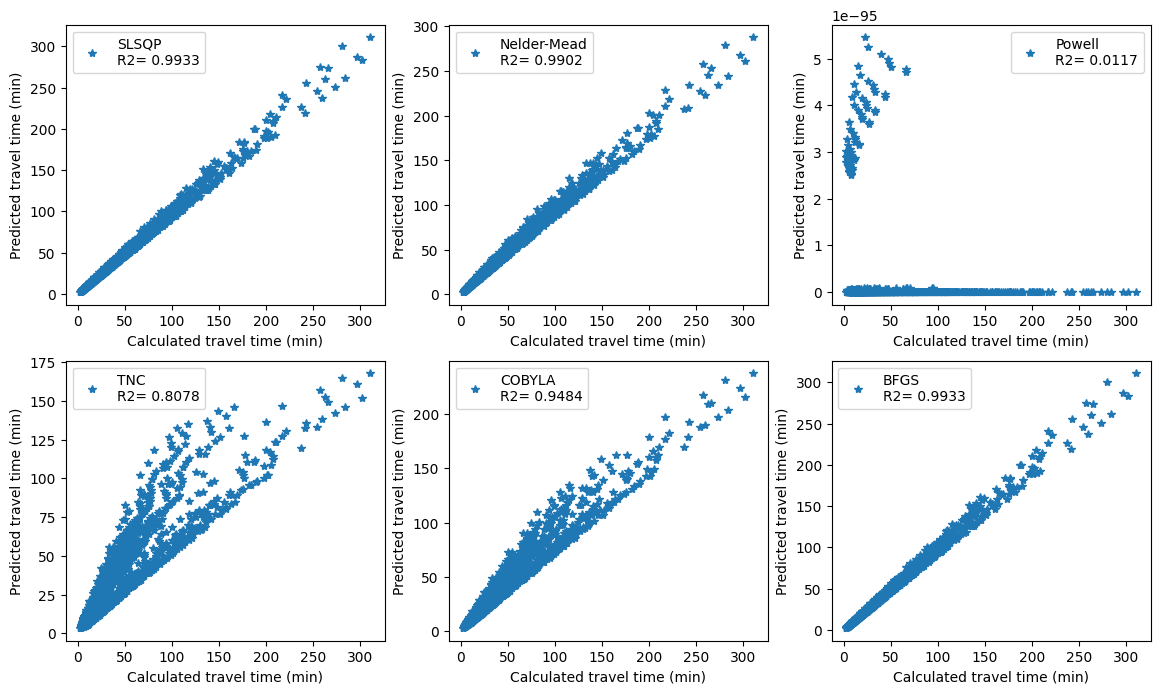

In [37]:

# Create a figure for plotting all optimization results.
# The figsize argument sets the width to 14 inches and height to 8 inches.
fig = plt.figure(figsize=(14, 8))

# Define the column names for the DataFrame that will store the optimization results (scores).
# 'Método' (Method): The optimization algorithm used.
# 'A', 'B', 'C', 'D', 'E': The optimized parameters of the model.
# 'R2': R-squared value, indicating the goodness of fit.
# 'mse': Mean Squared Error, a common metric for regression model performance.
# 'mae': Mean Absolute Error, another metric for regression model performance.
columnas = ['Método', 'A', 'B', 'C', 'D', 'E', 'R2', 'mse', 'mae']

# Create an empty Pandas DataFrame with the defined columns.
# This DataFrame will store the performance metrics and optimized parameters for each method.
dfScores = pd.DataFrame(columns=columnas)

# Define a list of optimization methods from SciPy to be tested.
methods = ["SLSQP", "Nelder-Mead", "Powell", "TNC", "COBYLA", "BFGS"]

# Initialize a counter for plotting subplots.
contador = 0

# Loop through each optimization method in the 'methods' list.
for j in methods:
    # Increment the counter for subplot positioning.
    contador += 1

    # Perform the optimization using scipy.optimize.minimize.
    # 'objective': The objective function to be minimized (e.g., sum of squared errors).
    # 'x0': Initial guess for the parameters.
    # 'method=j': Specifies the current optimization algorithm to use.
    # 'bounds=bnds': Defines the upper and lower bounds for each parameter during optimization.
    solution = minimize(objective, x0, method=j, bounds=bnds)

    # Extract the optimized parameters from the 'solution' object.
    x = solution.x

    # Calculate the predicted 'y' values using the optimized parameters 'x'.
    # 'calc_y' is assumed to be a user-defined function that takes the parameters 'x'
    # and the input data (e.g., dripline parameters) to produce predictions.
    y = calc_y(x)

    # Round and convert each optimized parameter to a string for display/concatenation.
    # These represent the coefficients (A, B, C, D, E) of your predictive model.
    cA = str(round(x[0], 4))
    cB = str(round(x[1], 4))
    cC = str(round(x[2], 4))
    cD = str(round(x[3], 4))
    cE = str(round(x[4], 4))

    # Perform linear regression between the measured/target 'ym' values and the predicted 'y' values.
    # This is done to calculate the R-squared value.
    slope, intercept, r_value, p_value, std_err = stats.linregress(ym, y)

    # Calculate the R-squared value by squaring the correlation coefficient and rounding to 4 decimal places.
    r2 = round(r_value**2, 4)
    # Convert the R-squared value to a string for display in the plot legend.
    cR2 = str(r2)

    # Calculate the Mean Squared Error (MSE) between the actual 'ym' and predicted 'y' values.
    # Round the result to 4 decimal places.
    mse = round(mean_squared_error(ym, y), 4)

    # Calculate the Mean Absolute Error (MAE) between the actual 'ym' and predicted 'y' values.
    # Round the result to 4 decimal places.
    mae = round(mean_absolute_error(ym, y), 4)

    # Add a new row to the dfScores DataFrame with the results for the current method.
    dfScores.loc[len(dfScores.index)] = [j, cA, cB, cC, cD, cE, cR2, mse, mae]

    # --- Plotting Section ---
    # Add a subplot to the figure.
    # (2, 3, contador) means a 2-row, 3-column grid of subplots, and 'contador' specifies
    # the current subplot's position (1-indexed).
    ax1 = fig.add_subplot(2, 3, contador)
    # Plot the calculated (actual) travel time (ym) against the predicted travel time (y)
    # using '*' markers. This creates a scatter plot.
    plt.plot(ym, y, '*')
    # Add a legend to the subplot, showing the method name and its R-squared value.
    plt.legend([str(j) + "\n" + "R2= " + cR2])
    # Set the x-axis label.
    plt.xlabel('Calculated travel time (min)')
    # Set the y-axis label.
    plt.ylabel('Predicted travel time (min)')
    # Disable the grid lines on the plot for a cleaner look (if desired).
    plt.grid(False)

# Sort the dfScores DataFrame by the 'R2' column in descending order.
# This makes it easy to see which optimization methods performed best in terms of R-squared.
dfScores_ordenados = dfScores.sort_values('R2', ascending=False)

# Display the sorted DataFrame with all the optimization results.
display(dfScores_ordenados)

# Show the entire figure containing all the subplots.
plt.show()

R^2 correlation = 0.9933
Slope: 0.9881565366653612
Intercept: 0.22614413076577478
P-value: 0.0
Standard Error: 0.0020763023966209725


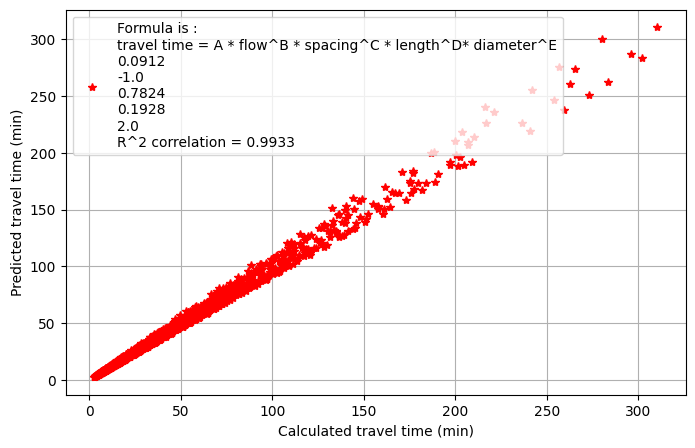

In [36]:
from scipy import stats

# ym: Valores reales (medidos).
# y: Valores predichos por el modelo.

# Realiza una regresión lineal entre los valores reales (ym) y los valores predichos (y).
# stats.linregress devuelve:
#   - slope: Pendiente de la recta de regresión.
#   - intercept: Intercepto de la recta de regresión.
#   - r_value: Coeficiente de correlación de Pearson (r).
#   - p_value: Valor p para la prueba de hipótesis (significancia estadística).
#   - std_err: Error estándar de la estimación.
slope, intercept, r_value, p_value, std_err = stats.linregress(ym, y)

# Calcula el coeficiente de determinación (R cuadrado).
r2 = round(r_value**2, 4)  # Eleva al cuadrado el coeficiente de correlación y lo redondea a 4 decimales.

# Formatea la cadena para mostrar el valor de R cuadrado.
cR2 = "R^2 correlation = " + str(r2) #Se concatena la cadena "R^2 correlation = " con el valor de r2 convertido a string.
#Una mejor forma de hacerlo es la siguiente:
#cR2 = f"R^2 correlation = {r2}"

# Imprime el valor de R cuadrado.
print(cR2)

#Otras impresiones útiles
print(f"Slope: {slope}") #Imprime la pendiente
print(f"Intercept: {intercept}") #Imprime el intercepto
print(f"P-value: {p_value}") #Imprime el valor p
print(f"Standard Error: {std_err}") #Imprime el error estándar
cFormula = "Formula is : " + "\n" \
           + "travel time = A * flow^B * spacing^C * length^D* diameter^E"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n"+ cE + "\n" + cR2

# plot solution
plt.figure(figsize=(8,5))
#plt.title('Calculated travel time versus Predicted  Outcomes For Non-Linear Regression')
plt.plot(ym,y,'r*')
plt.xlabel('Calculated travel time (min)')
plt.ylabel('Predicted travel time (min)')
plt.legend([cLegend])
plt.grid(True)

plt.show()